# Automobile price prediction

-  Here,I am using different approch to fillna.We generally prefer to use mean,median or bachward fill,forward fill and so on for numric columns similarly we generally prefer to fill by mode for categoricals data.The down fall of this both approch is that it affect the distribution which we do not want.
-  Similary,I will use mutual info to extract information importance feature

For this purpose,I am downloading Automobile data from kaggle

In [1]:
%matplotlib inline
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
pd.set_option('display.max_columns', 100)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
df=pd.read_csv('Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


we can see there are some '?' in this data set.lets check in which columns do we have '?'.

In [3]:
df[df.isin(['?']).any(axis=1)] # check for ? 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


So, we can see these are the columns  normalized-losses,num-of-doors,bore,stroke,horsepower,peak-rpm,price with '?'

In [18]:
df=df.replace('l',np.NaN) # replace 1 by nan

In [19]:
df=df.replace('?',np.NaN) # repalcing '? ' by nan value
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type          12
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [20]:
cat_col=[col for col in df.columns if df[col].dtype=='O']  # categorical columns
cat_col

['normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system',
 'bore',
 'stroke',
 'horsepower',
 'peak-rpm',
 'price']

we can see that columns such as Price,horsepower,peak_rmp,stroke,bore are consider as categoricals columns because of the presence
of '?'.first we need to change into numeric columns

In [21]:
num_col=[col for col in df.columns if df[col].dtype!='O']  #nuericals columns(continous columns)
num_col

['symboling',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'compression-ratio',
 'city-mpg',
 'highway-mpg']

In [22]:
len(num_col)

10

In [23]:
def convert_numeric(col):  # converting categorical columns to numeric
    df[col]=pd.to_numeric(df[col],errors='coerce')

In [32]:
cat_col=[col for col in df.columns if df[col].dtype=='O']
cat_col

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In [33]:
num_col=[col for col in df.columns if df[col].dtype!='O']
num_col

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [26]:
convert_numeric('normalized-losses')

In [27]:
for i in ['price','horsepower','peak-rpm','stroke','bore']:  # converting these column to numerics
    convert_numeric(i)

In [14]:
df.dtypes # now check the data types all above mentioned columns are converted into numeric

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

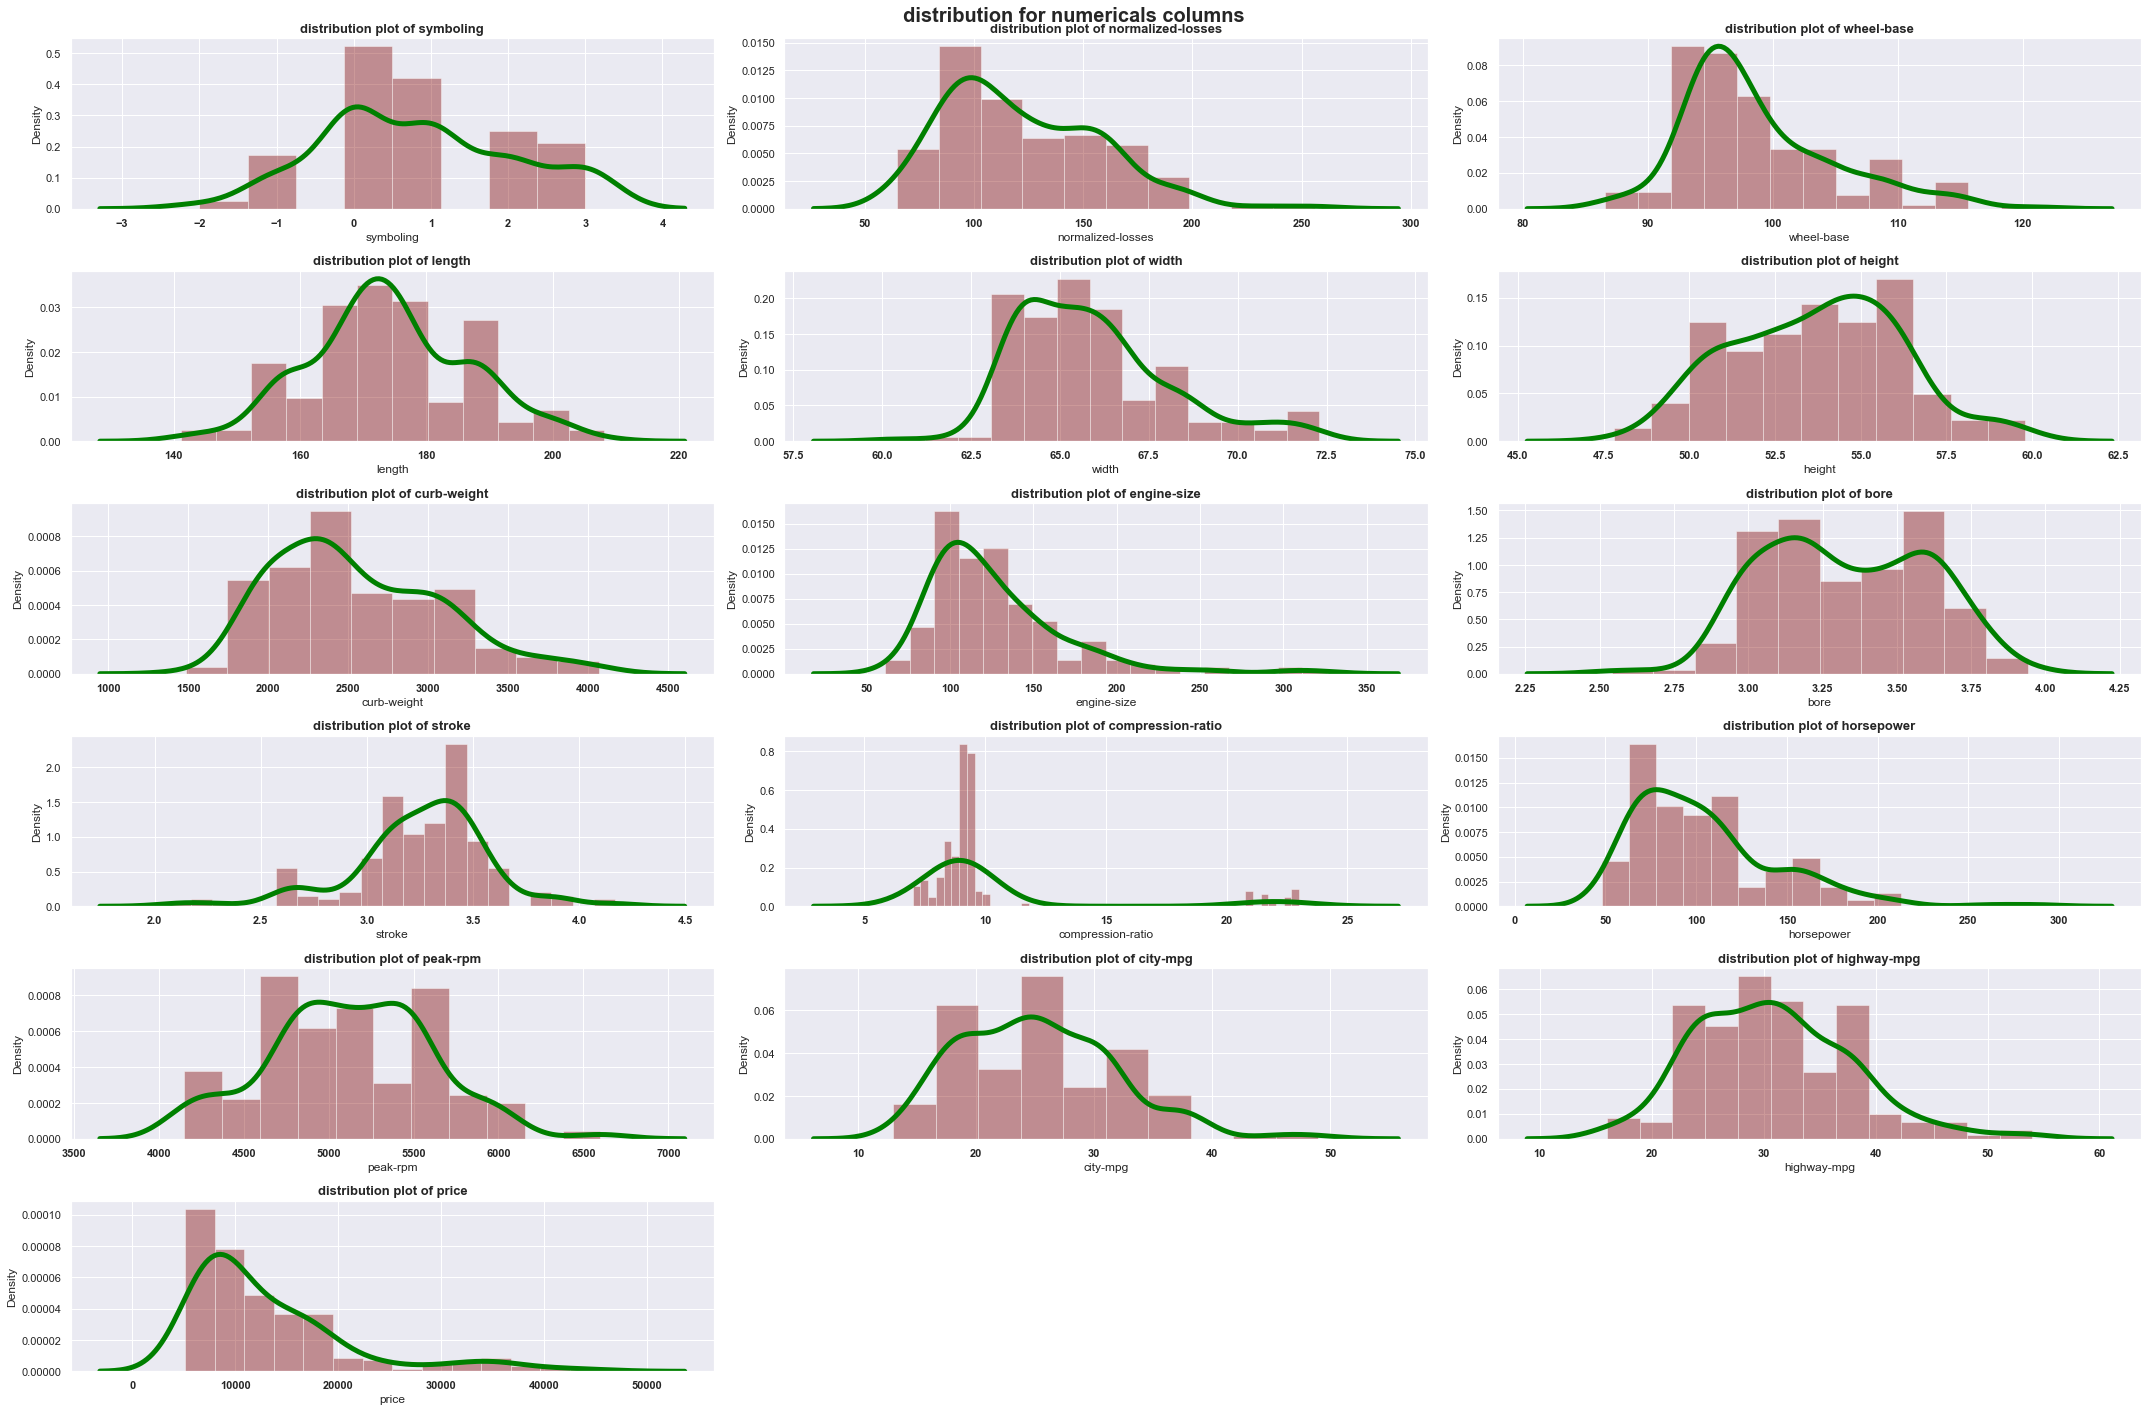

In [34]:
#lets  see the distribution plot for numeric columns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
for i,col in enumerate(num_col):
  plt.suptitle('distribution for numericals columns',fontweight='bold',fontsize=20)
  plt.subplot(6,3,i+1)
  plt.xticks(fontweight='bold')
  plt.xticks(fontweight='bold')
  sns.distplot(df[col],color='maroon',kde_kws={'linewidth':5,'color':'green'})
  plt.title(f'distribution plot of {col}',fontweight='bold',fontsize=13)
  plt.tight_layout()

we can see most of the numeric data types are right skwed. so most of the outliers exist in the right hand side.which can be
see in below bok plot

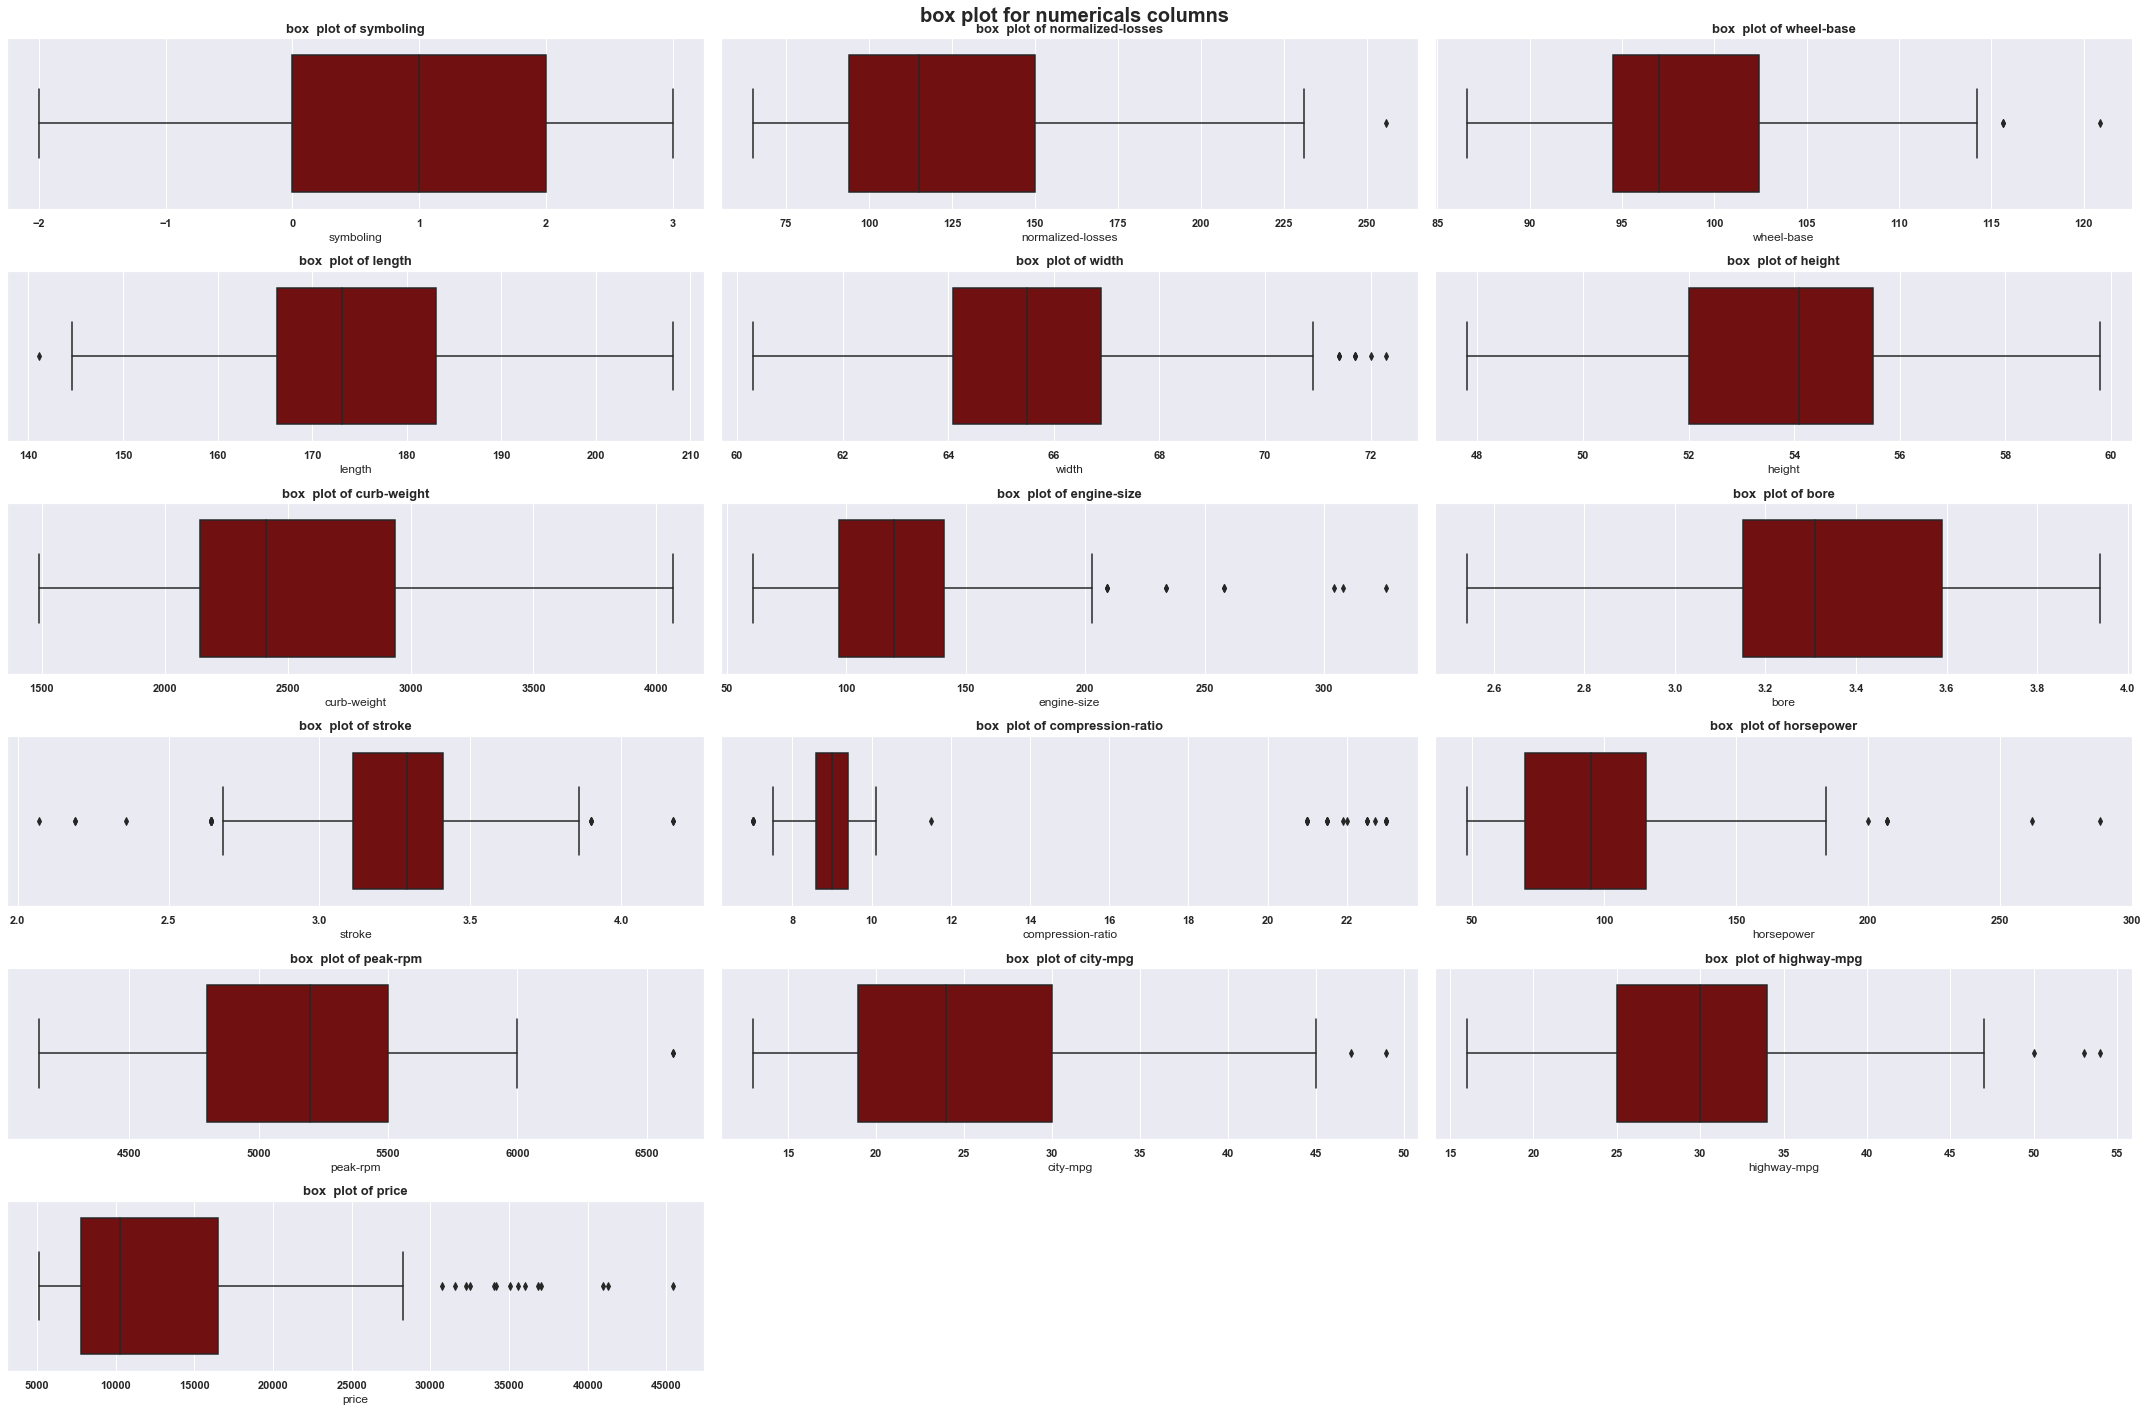

In [35]:
#lets used box plot to see ouliers in each columns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
for i,col in enumerate(num_col):
  plt.suptitle('box plot for numericals columns',fontweight='bold',fontsize=20)
  plt.subplot(6,3,i+1)
  plt.xticks(fontweight='bold')
  plt.xticks(fontweight='bold')
  sns.boxplot(df[col],color='maroon')
  plt.title(f'box  plot of {col}',fontweight='bold',fontsize=13)
  plt.tight_layout()

AS I said most of the outliers exits in  right hand side as all distribution is right skewed. expect for columns in stroke were
outliers exist in left hand side

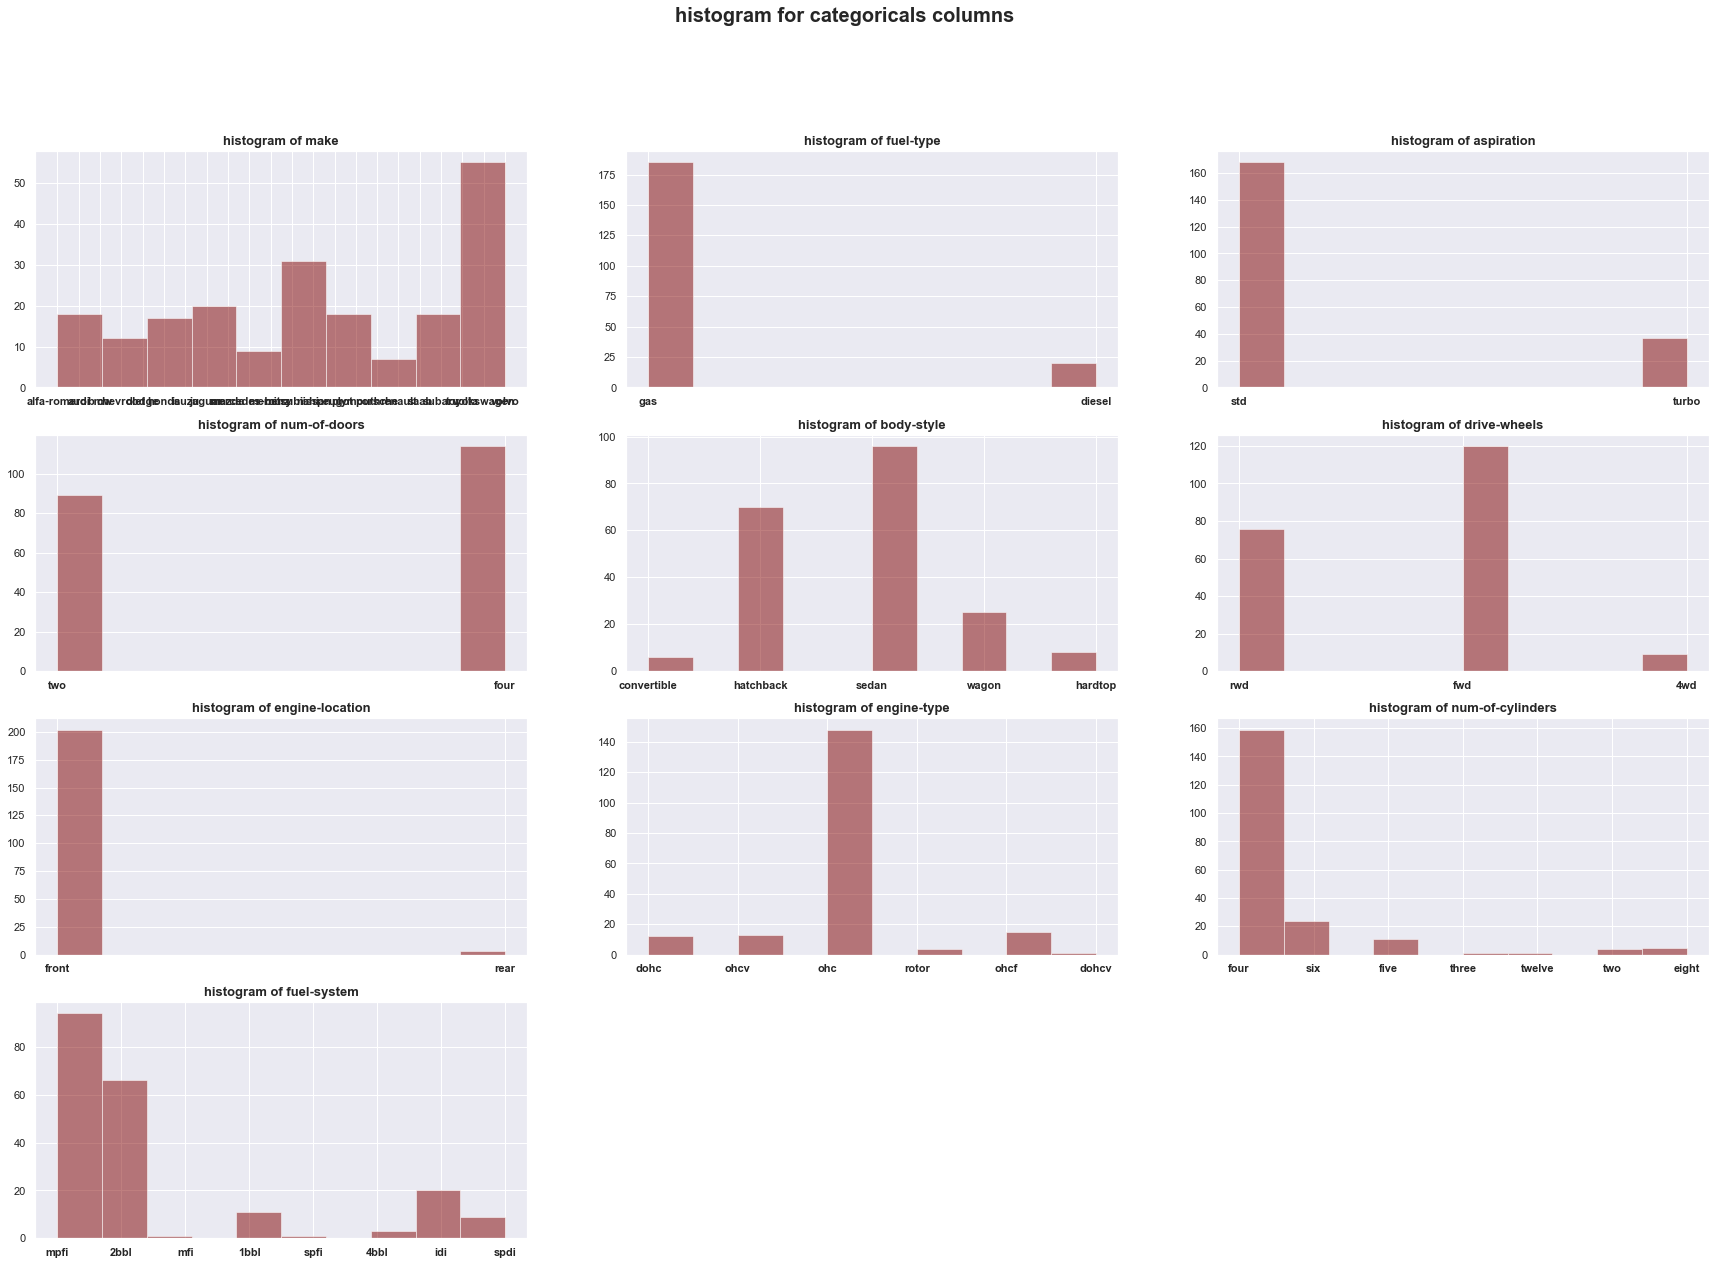

In [37]:
# histogram for categorical columns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
for i,col in enumerate(cat_col):
  plt.suptitle('histogram for categoricals columns',fontweight='bold',fontsize=20)
  plt.subplot(4,3,i+1)
  plt.xticks(fontweight='bold')
  plt.xticks(fontweight='bold')
  df[col].hist(color='maroon',alpha=0.5)
  plt.title(f'histogram of {col}',fontweight='bold',fontsize=13)

In [38]:
df.isna().sum() # lets see is there any nan value in the dataset

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type          12
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [39]:
# i have created function that fill the nan value in equal proportion without affecting distribution
def ramdom_sample_imputation(col):
  random_sample=df[col].dropna().sample(df[col].isna().sum())
  random_sample.index=df[df[col].isnull()].index
  df.loc[df[col].isnull(),col]=random_sample

In [40]:
for i in [col for col in df.columns if df[col].dtype!='O']: #applying my fucntion in continous columns(numeric columns)
    ramdom_sample_imputation(i)
    

In [41]:
# categorical imputation
ramdom_sample_imputation('num-of-doors')
ramdom_sample_imputation('engine-type')

In [42]:
#after applying function
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

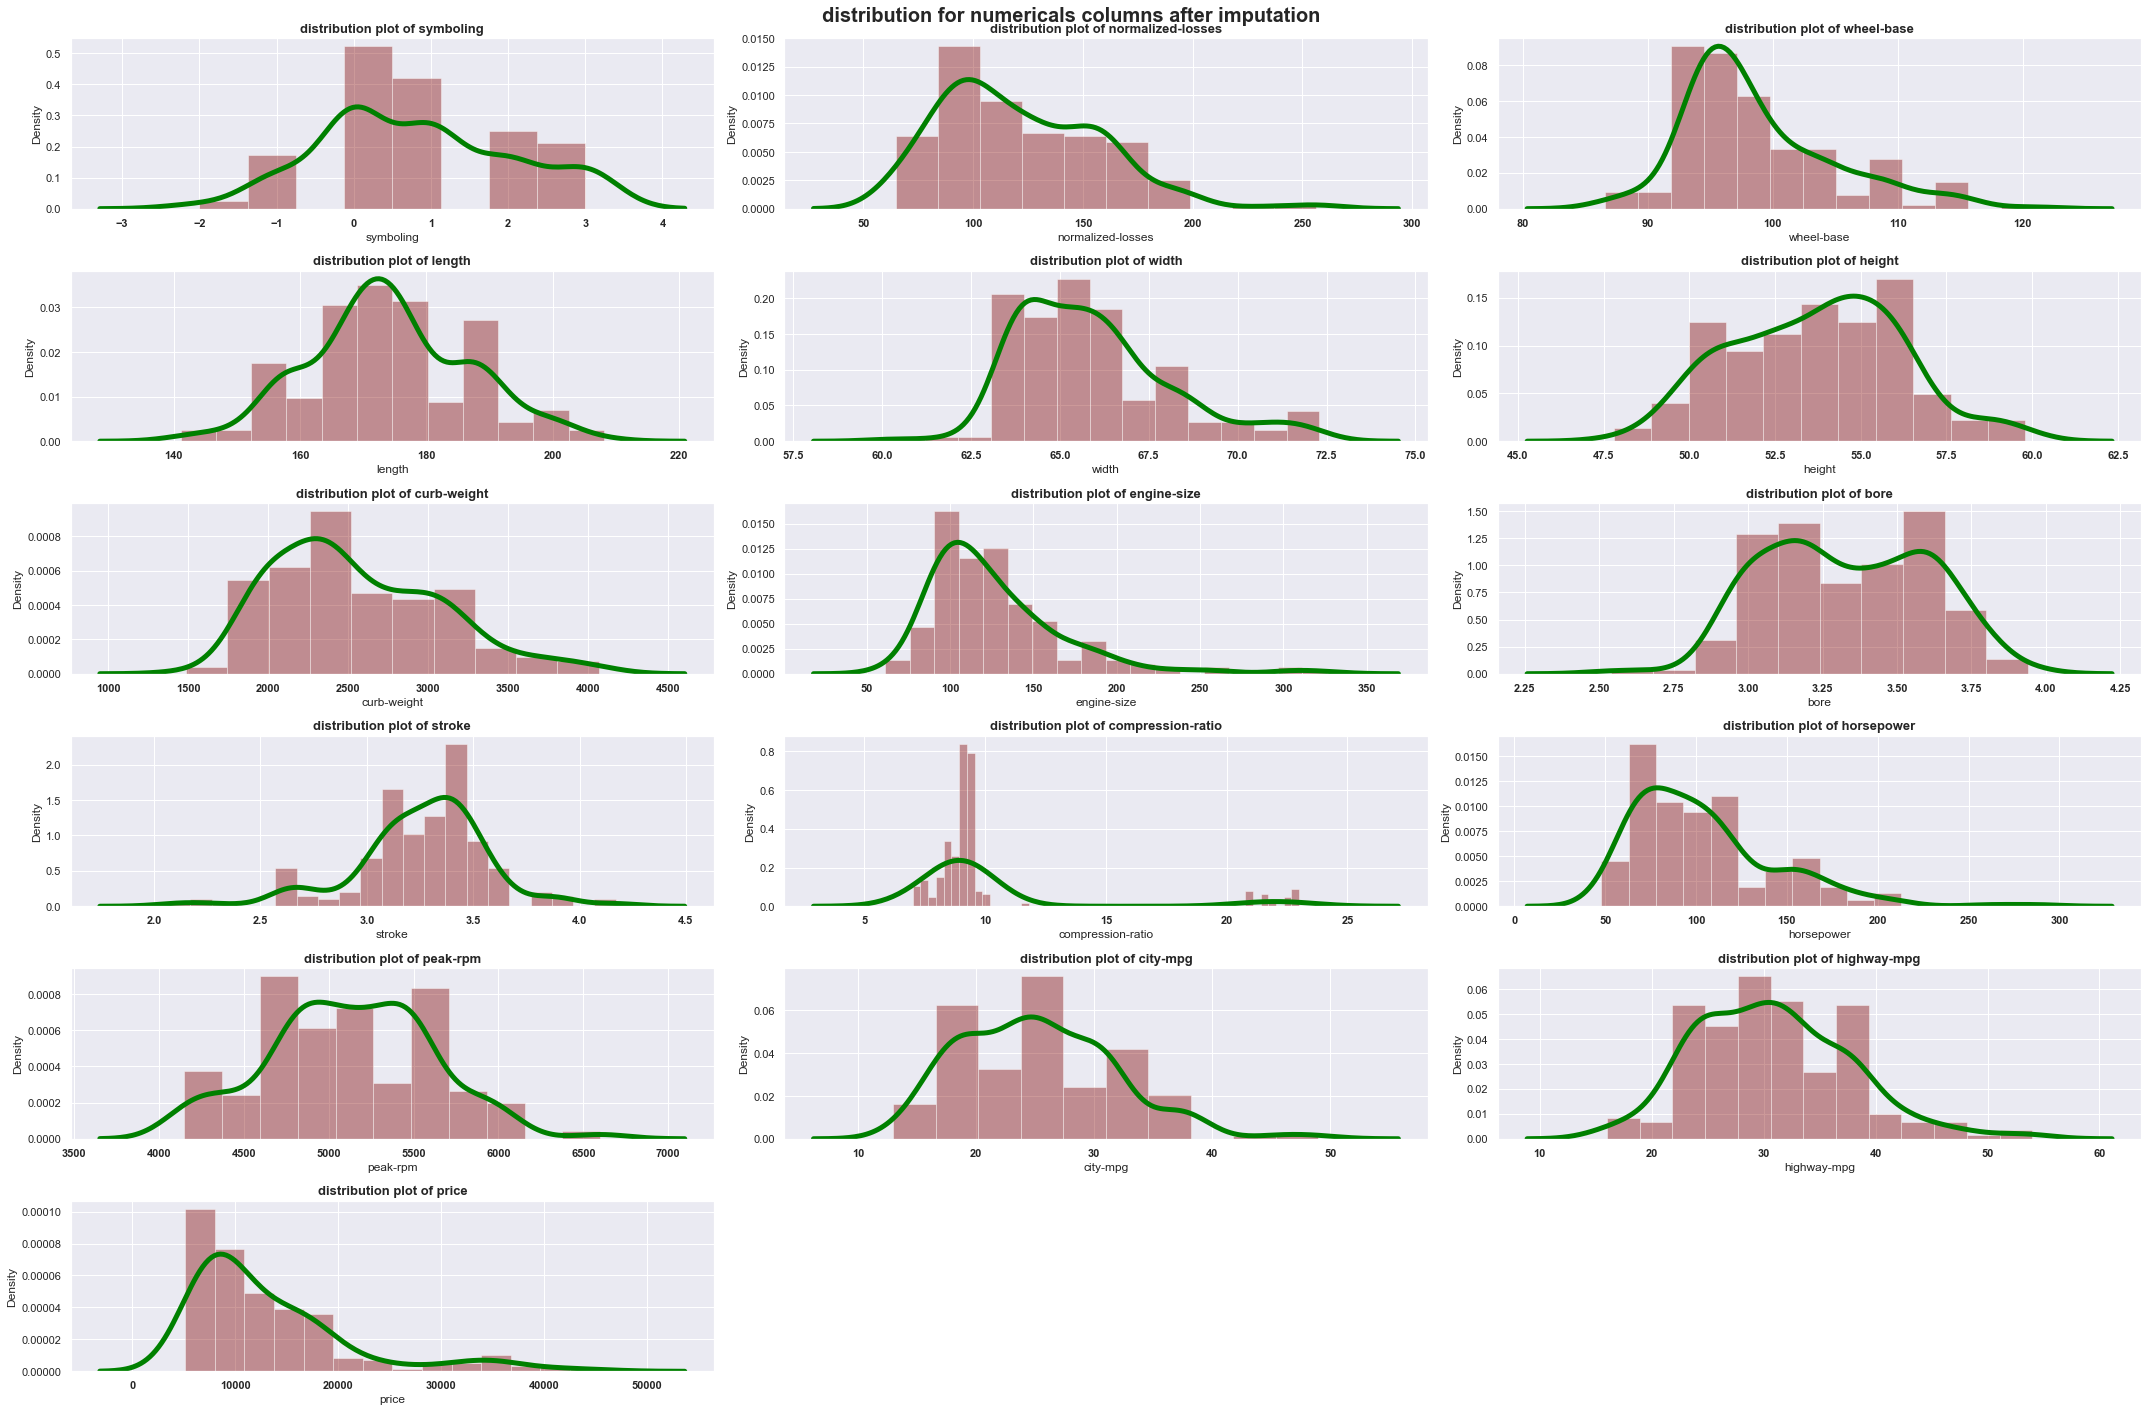

In [43]:
# we again make distribution plot after imputation
# we can see the distribution does not chahges
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
for i,col in enumerate(num_col):
  plt.suptitle('distribution for numericals columns after imputation ',fontweight='bold',fontsize=20)
  plt.subplot(6,3,i+1)
  plt.xticks(fontweight='bold')
  plt.xticks(fontweight='bold')
  sns.distplot(df[col],color='maroon',kde_kws={'linewidth':5,'color':'green'})
  plt.title(f'distribution plot of {col}',fontweight='bold',fontsize=13)
  plt.tight_layout()

# Outlier treatment

In [44]:
# here we make custom function to that any value greater than upper bound by upper bound
#similarly any value less than lower bound is replaced by lower bound
def outlier(col):
    #fig,(ax1,ax2)=plt.subplots(2,1)
    #sns.boxplot(df[col],ax=ax1,color='maroon')
    #ax1.set_title(f' {col} column before removing outliers')
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    ub=1.5*IQR+q3
    lb=q1-1.5*IQR
    df[col]=np.where(df[col]>ub,ub,np.where(df[col]<lb,lb,df[col]))
    #sns.boxplot(df[col],ax=ax2)
    #ax2.set_title(f'{col} column after removing outliers')
    #plt.tight_layout()

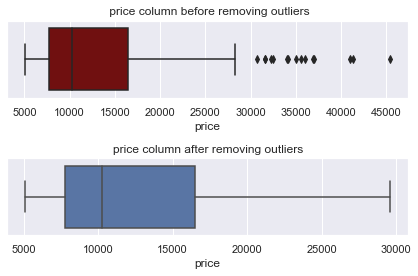

In [38]:
outlier('price')

In [45]:
# applying function to numeric columns
for i in num_col:
    outlier(i)

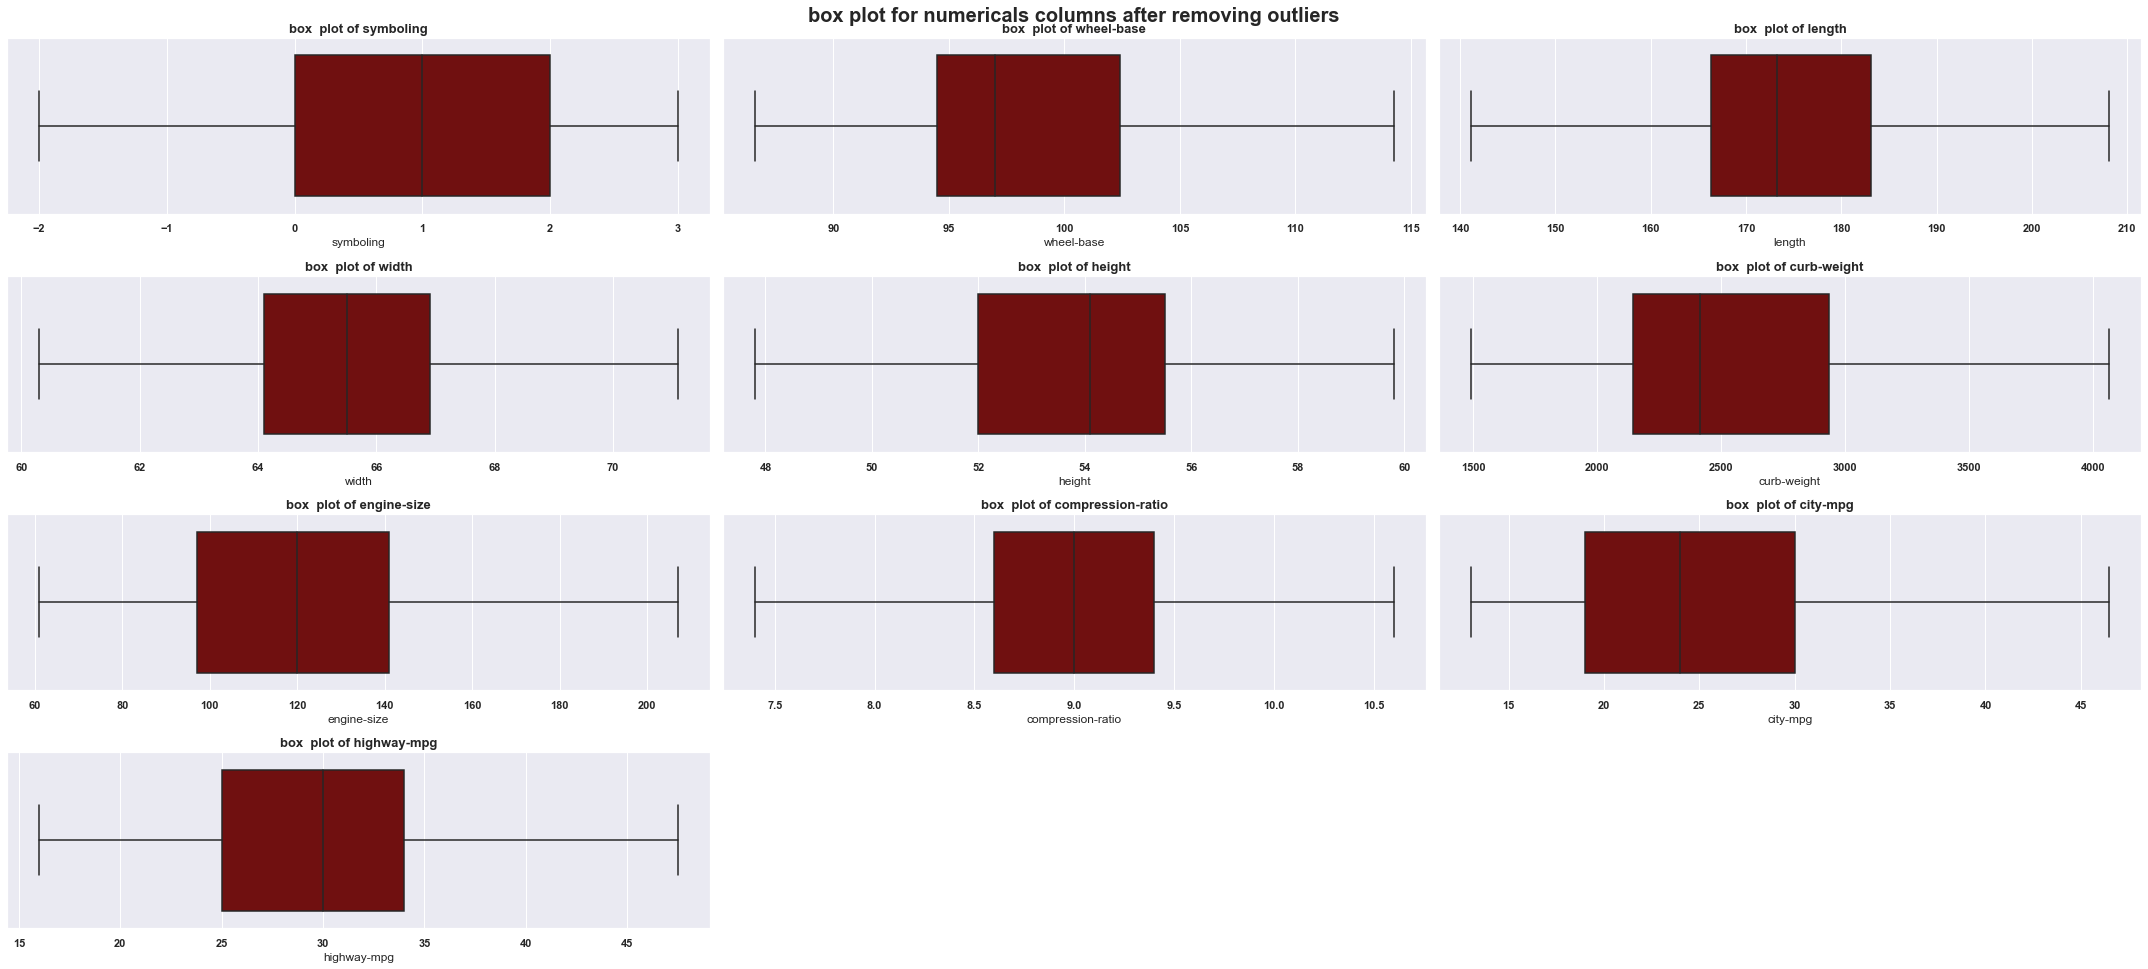

In [40]:
# lets again see the box  plot after removing outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
for i,col in enumerate(num_col):
  plt.suptitle('box plot for numericals columns after removing outliers',fontweight='bold',fontsize=20)
  plt.subplot(6,3,i+1)
  plt.xticks(fontweight='bold')
  plt.xticks(fontweight='bold')
  sns.boxplot(df[col],color='maroon')
  plt.title(f'box  plot of {col}',fontweight='bold',fontsize=13)
  plt.tight_layout()

we can see in above figure there are no outliers

# Feature Extraction

In [46]:
X = df.copy()
y = X.pop("price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [47]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)


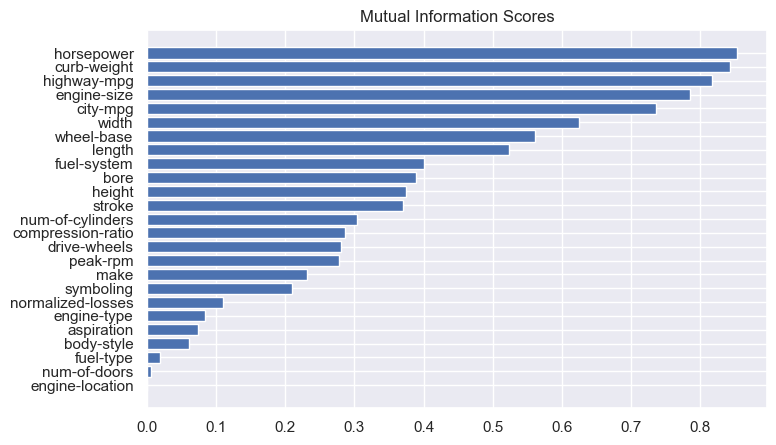

In [48]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

The least possible mutual information between quantities is 0.0. When MI is zero, the quantities are independent: neither can tell you anything about the other. Conversely, in theory there's no upper bound to what MI can be. In practice though values above 2.0 or so are uncommon. (Mutual information is a logarithmic quantity, so it increases very slowly.)

In [49]:
df1=mi_scores.reset_index()
my_col=list(df1.nlargest(10,'MI Scores')['index'])
my_col

['horsepower',
 'curb-weight',
 'highway-mpg',
 'engine-size',
 'city-mpg',
 'width',
 'wheel-base',
 'length',
 'fuel-system',
 'bore']

In [50]:
X=X[my_col]
X.select_dtypes(['int64','float64'])

,horsepower,curb-weight,highway-mpg,engine-size,city-mpg,width,wheel-base,length,fuel-system,bore
0,111.0,2548.0,27.0,130.0,21.0,64.1,88.6,168.8,0,3.47
1,111.0,2548.0,27.0,130.0,21.0,64.1,88.6,168.8,0,3.47
2,154.0,2823.0,26.0,152.0,19.0,65.5,94.5,171.2,0,2.68
3,102.0,2337.0,30.0,109.0,24.0,66.2,99.8,176.6,0,3.19
4,115.0,2824.0,22.0,136.0,18.0,66.4,99.4,176.6,0,3.19
...,...,...,...,...,...,...,...,...,...,...
200,114.0,2952.0,28.0,141.0,23.0,68.9,109.1,188.8,0,3.78
201,160.0,3049.0,25.0,141.0,19.0,68.8,109.1,188.8,0,3.78
202,134.0,3012.0,23.0,173.0,18.0,68.9,109.1,188.8,0,3.58
203,106.0,3217.0,27.0,145.0,26.0,68.9,109.1,188.8,6,3.01


In [54]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold=KFold(n_splits=5,shuffle=True,random_state=0)  # sratified k fold cross validation



# RandomForestRegressor

In [58]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('minmax',MinMaxScaler()),
                              ('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))
                             ])

scores = cross_val_score(my_pipeline, X, y,
                              cv=kfold,
                              scoring='r2')



In [59]:
print(f' mean r2 score is {np.mean(scores)}')

 mean r2 score is 0.8226423421103963


# XGBRegressor

In [65]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_pipeline = Pipeline(steps=[('minmax',MinMaxScaler()),
                                  ('model', my_model)
                                 ])
scores = cross_val_score(my_pipeline, X, y,
                                  cv=kfold,
                                  scoring='r2')

In [69]:
print(f' mean r2:- {np.mean(scores)}')

 mean r2:- 0.8300855262263351


# Hypertunning

In [73]:
params={
    'model__n_estimators':[100,200,300,400,500,600,700,800,900,1000 ],
     'model__learning_rate':[0.01,0.02,0.03,0.04,0.05]
    
}

In [74]:
model = XGBRegressor()
my_pipeline = Pipeline(steps=[('minmax',MinMaxScaler()),
                                  ('model', model)
                                 ])

#scores = cross_val_score(my_pipeline, X, y,cv=kfold,scoring='r2')
random_search=RandomizedSearchCV(my_pipeline,param_distributions=params,n_iter=5,scoring='r2',
                                 n_jobs=-1, cv=kfold,verbose=1)

In [75]:
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('minmax', MinMaxScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           gamma=None,
                                                           gpu_id=None,
                                                           importance_type='gain',
                                                           interaction_constraints=None,
                                                           learning_rate=None,
           

In [76]:
random_search.best_params_  # best parameter

{'model__n_estimators': 200, 'model__learning_rate': 0.02}

In [77]:
random_search.best_score_  # best score

0.8272251113043232